In [139]:
import numpy as np
import matplotlib.pyplot as plt
import corner
%matplotlib inline

import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.lines import Line2D

In [268]:
flowMC_data = np.load('../data/GW150914_flowMC.npz')
bilby_data = np.genfromtxt('../data/GW150914_Bilby.dat')
axis_labels=  [r'$M_c$', r'$q$', r'$\chi_1$', r'$\chi_2$', r'$d_{\rm{L}}$', r'$\phi_c$', r'$\iota$', r'$\psi$', 'RA', 'DEC']
flowMC_chains = flowMC_data['chains'][:,:,[0,1,2,3,4,6,7,8,9,10]].reshape(-1,10)
bilby_chains = bilby_data[1:,[1,0,2,3,6,11,9,10,8,7]]
flowMC_chains[:,6] = np.arccos(flowMC_chains[:,6])
flowMC_chains[:,9] = np.arcsin(flowMC_chains[:,9])

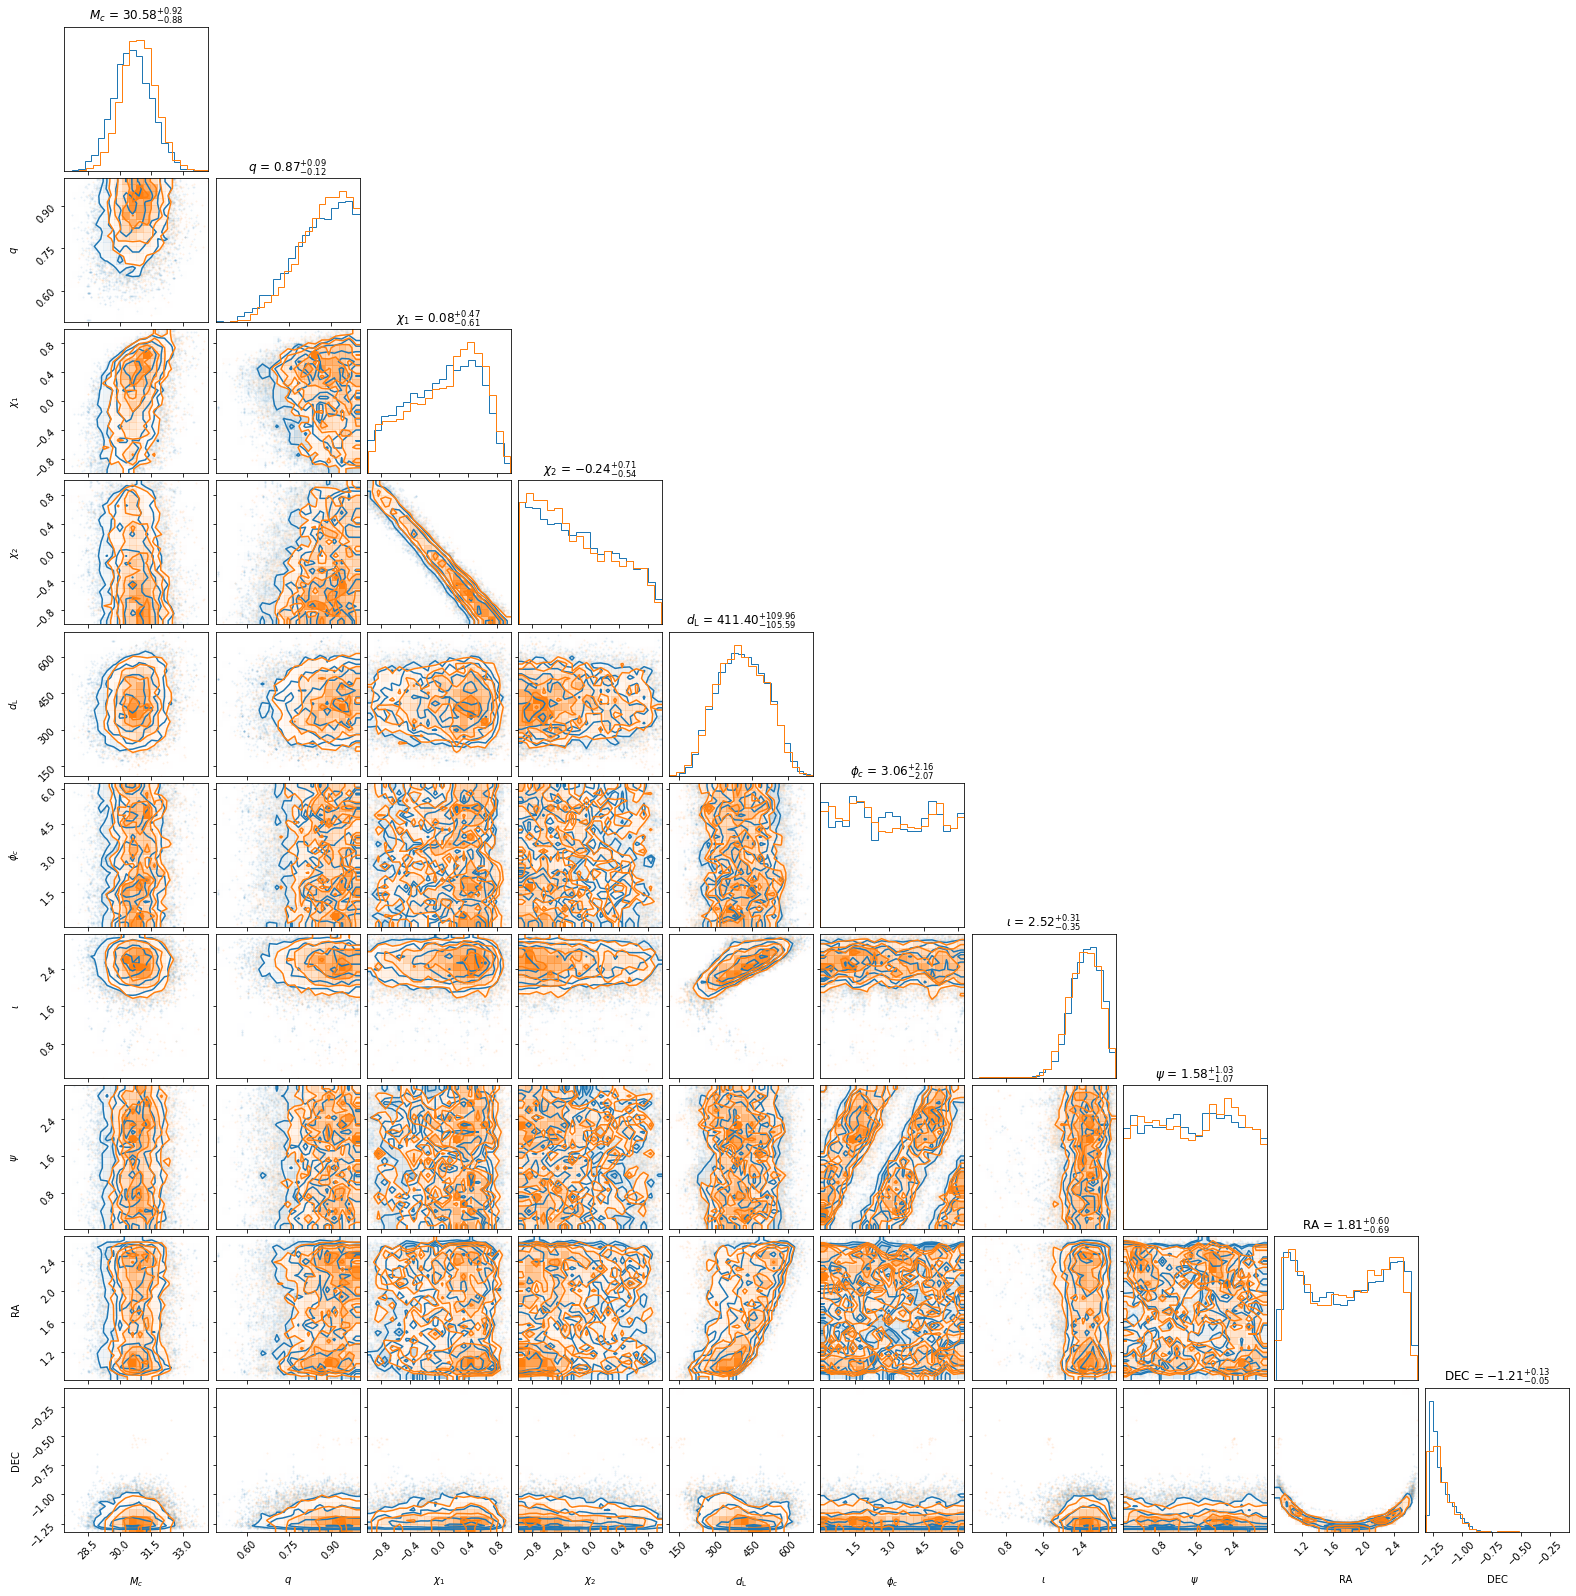

In [269]:
fig = corner.corner(flowMC_chains,color='C0',labels=axis_labels,show_titles=True,hist_kwargs={'density':True})
fig = corner.corner(bilby_chains,fig=fig,color='C1',hist_kwargs={'density':True})

In [267]:
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
from scipy.stats import gaussian_kde
jsd = []
for i in range(10):
    total_samples = np.concatenate((flowMC_chains[:,i],bilby_chains[:,i]))
    p_range = (np.min(total_samples),np.max(total_samples))
    axis = np.linspace(p_range[0],p_range[1],100)
    flow_p = gaussian_kde(flowMC_chains[:,i])(axis)
    bilby_p = gaussian_kde(bilby_chains[:,i])(axis)
    jsd.append(jensenshannon(flow_p,bilby_p)**2)
print(np.mean(jsd),np.max(jsd),jsd)

0.003128419214501815 0.017158469048226575 [0.017158469048226575, 0.003606625481300257, 0.0023394328231373584, 0.000988346750141447, 0.0009503399519950333, 0.00032217274802005797, 0.002615879140587151, 0.0005599436096602582, 0.000725689701442609, 0.0020172928905074017]


In [320]:
data = np.load('/mnt/home/wwong/ceph/GWProject/JaxGW/RealtimePE/GW170817.npz')
np.savez('../data/GW170817_flowMC_1800.npz',chains=data['chains'][:,::1000])

In [321]:
flowMC_data = np.load('../data/GW170817_flowMC_1800.npz')
bilby_data = np.genfromtxt('../data/GW170817_Bilby_flat.dat')
axis_labels=  [r'$M_c$', r'$q$', r'$\chi_1$', r'$\chi_2$', r'$d_{\rm{L}}$', r'$\phi_c$', r'$\iota$', r'$\psi$', 'RA', 'DEC']
flowMC_chains = flowMC_data['chains'][:,:,[0,1,2,3,4,6,7,8,9,10]].reshape(-1,10)
bilby_chains = bilby_data[1:,[0,1,2,3,4,8,9,7,6,5]]
flowMC_chains[:,6] = np.arccos(flowMC_chains[:,6])
flowMC_chains[:,9] = np.arcsin(flowMC_chains[:,9])
# bilby_chains[:,5] = bilby_chains[:,5] - 1187008882.4

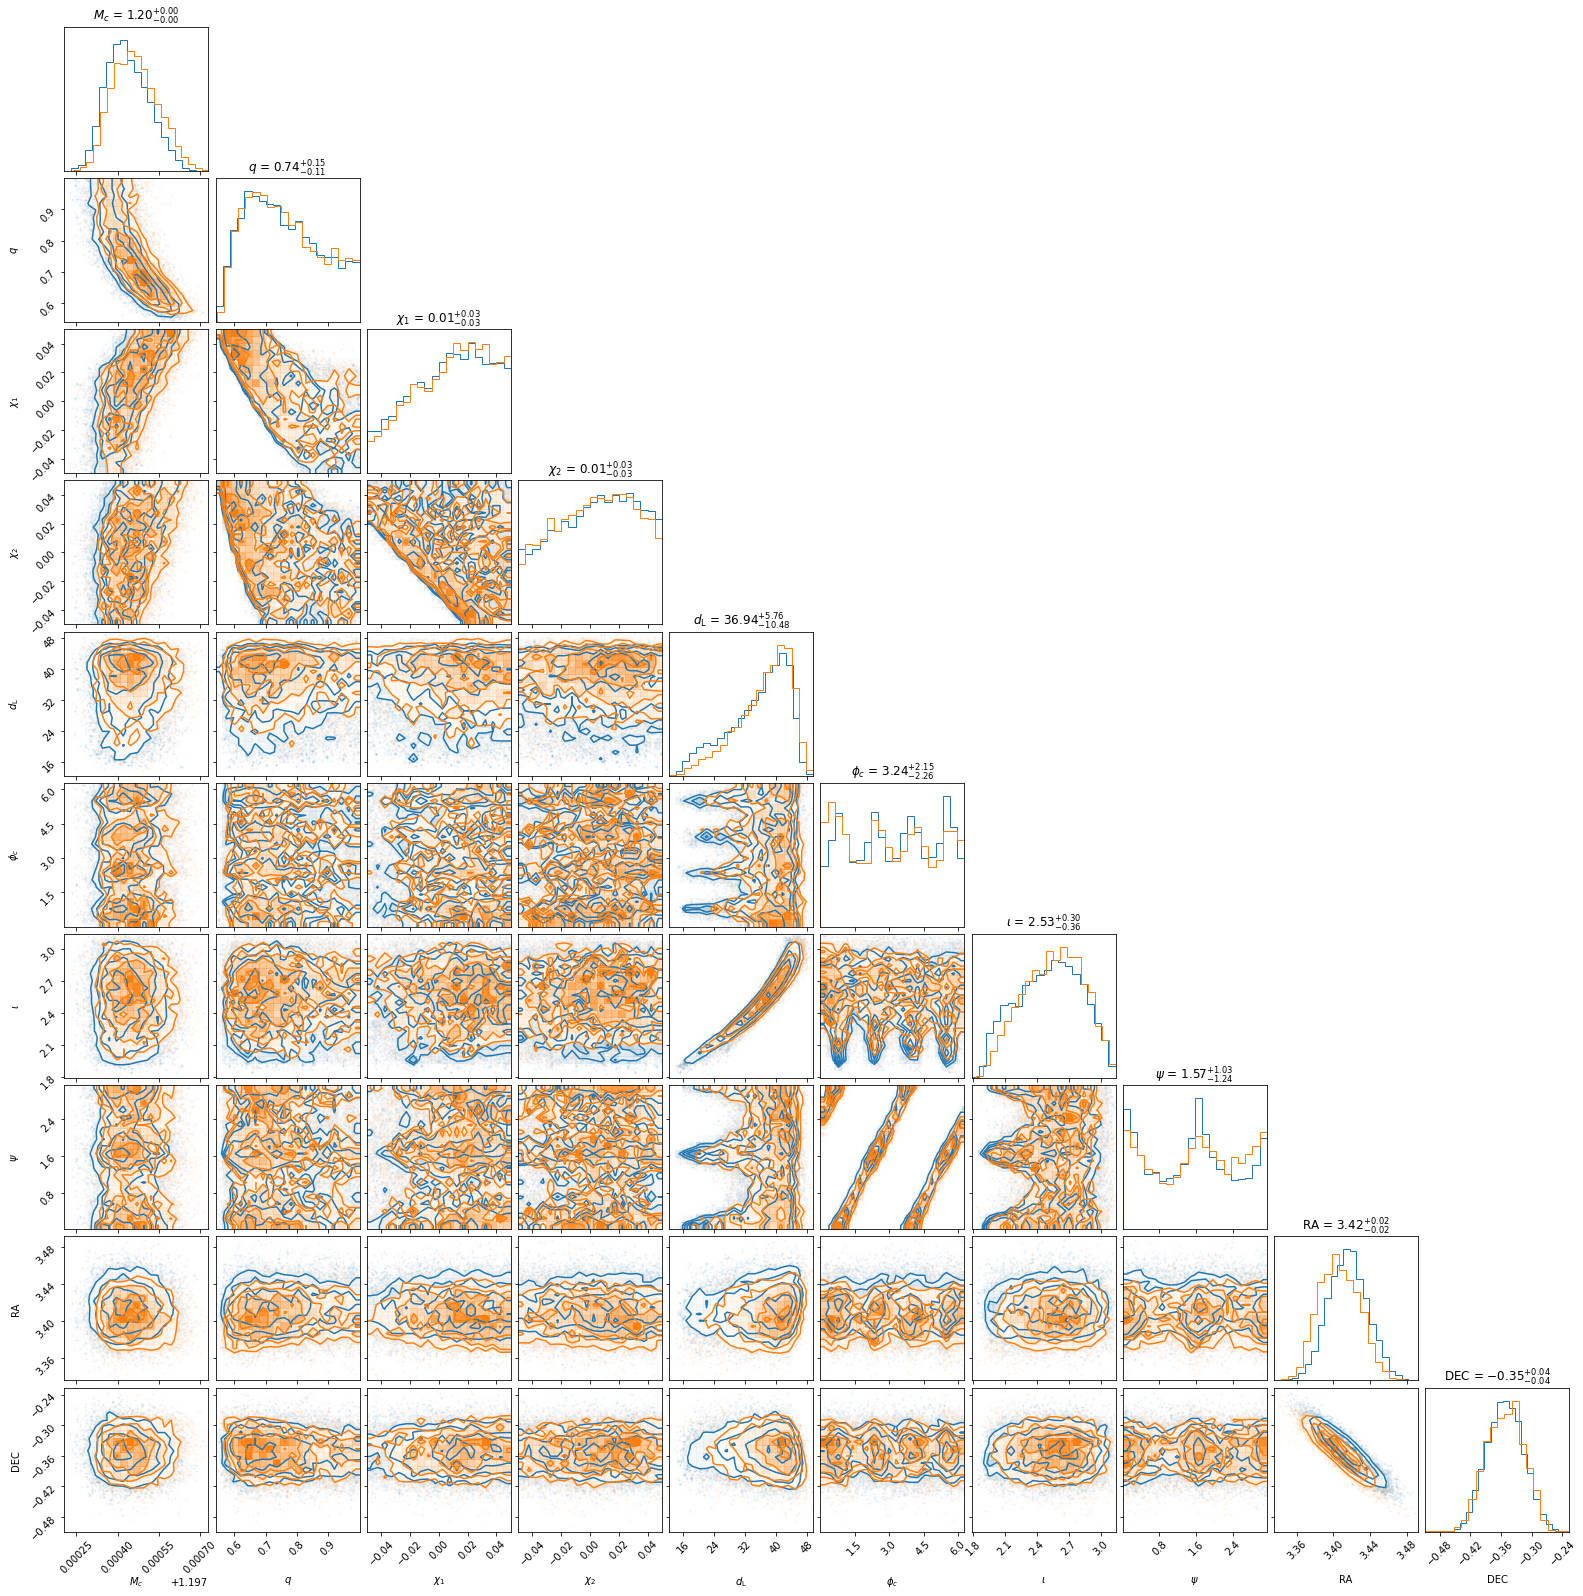

In [322]:
# fig = corner.corner(flowMC_chains[(np.abs(flowMC_chains[:,2])<0.05)*(np.abs(flowMC_chains[:,3])<0.05)],color='C0',labels=axis_labels,show_titles=True,hist_kwargs={'density':True})
fig = corner.corner(flowMC_chains,color='C0',labels=axis_labels,show_titles=True,hist_kwargs={'density':True})
fig = corner.corner(bilby_chains,fig=fig,color='C1',hist_kwargs={'density':True})

In [315]:
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
from scipy.stats import gaussian_kde
jsd = []
for i in range(10):
    total_samples = np.concatenate((flowMC_chains[:,i],bilby_chains[:,i]))
    p_range = (np.min(total_samples),np.max(total_samples))
    axis = np.linspace(p_range[0],p_range[1],100)
    flow_p = gaussian_kde(flowMC_chains[:,i])(axis)
    bilby_p = gaussian_kde(bilby_chains[:,i])(axis)
    jsd.append(jensenshannon(flow_p,bilby_p)**2)
print(jsd)

[0.016599863959599222, 0.0004000730127564279, 0.0006346910645998469, 0.00041191609530489334, 0.007578659551227158, 0.0024327368241353012, 0.004533057977966113, 0.0034001568903697437, 0.02415829426366041, 0.001732995749791972]


In [316]:
print(np.mean(jsd),0.003128419214501815)

0.006188244538941109 0.003128419214501815
